In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('zoo.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
unique_class_count = pd.value_counts(data.class_type)
unique_class_count

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [40]:
from sklearn.cluster import AgglomerativeClustering

x = data.iloc[:, [1, 17]].values

clustering = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward').fit(x)
clustering
clustering.labels_

array([3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 2, 1, 4, 4, 4, 2, 3, 1, 2, 2, 2,
       3, 2, 0, 6, 6, 3, 3, 3, 0, 3, 3, 2, 1, 3, 3, 2, 1, 0, 0, 2, 0, 2,
       3, 3, 4, 3, 3, 3, 3, 0, 6, 4, 3, 3, 2, 2, 2, 2, 1, 1, 5, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 4, 1, 3, 3, 5, 4, 2, 2, 5, 4, 1, 2, 3, 4, 1, 2,
       0, 6, 5, 5, 1, 3, 3, 2, 3, 0, 3, 4, 2], dtype=int64)

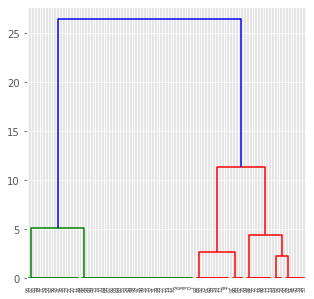

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (5,5)
plt.style.use('ggplot')

f1 = data['class_type'].values
fb = f1[0:100]

X = np.array(list(zip(fb)))
Z = linkage(X, 'ward')

fig = plt.figure(figsize = (5,5))
dn = dendrogram(Z)
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(data['class_type'],clustering.labels_)
rmse

6.702970297029703